In [46]:
import os
import pathlib
from collections import Counter
from statistics import mean

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns; 
import textstat as ts

In [47]:
from sentence_transformers import SentenceTransformer
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
import torch


In [49]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
0
NVIDIA GeForce RTX 3050 Laptop GPU


---


In [50]:
dataset_dir_path =  pathlib.Path("../Dataset/asap-aes").resolve()
dataset_dir_path

WindowsPath('E:/SEMESTER 6/NLP/UAS/Dataset/asap-aes')

In [51]:
raw_dataset = pd.read_csv(dataset_dir_path/'training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')

In [52]:
dataset = raw_dataset.copy()

dataset

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


- essay_id: A unique identifier for each individual student essay
- essay_set: 1-8, an id for each set of essays
- essay: The ascii text of a student's response
- rater1_domain1: Rater 1's domain 1 score; all essays have this
- rater2_domain1: Rater 2's domain 1 score; all essays have this
- rater3_domain1: Rater 3's domain 1 score; only some essays in set 8 have this.
- domain1_score: Resolved score between the raters; all essays have this
- rater1_domain2: Rater 1's domain 2 score; only essays in set 2 have this
- rater2_domain2: Rater 2's domain 2 score; only essays in set 2 have this
- domain2_score: Resolved score between the raters; only essays in set 2 have this
- rater1_trait1 score - rater3_trait6 score: trait scores for sets 7-8


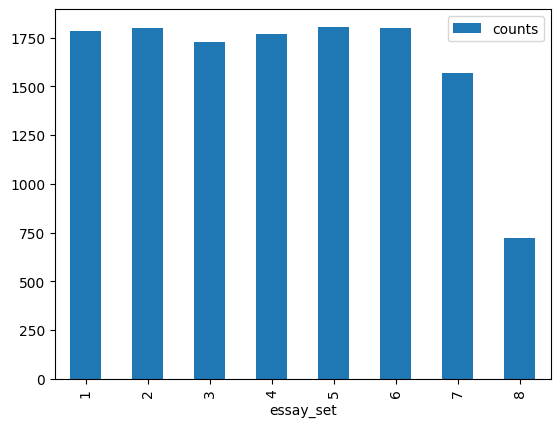

In [53]:
df.essay_set.value_counts().rename_axis('essay_set').reset_index(name='counts').sort_values(
    'essay_set').plot(kind='bar', x="essay_set", y="counts");

---


# Preprocess


In [54]:
df = dataset.dropna(axis='columns')